In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import itertools 
from scipy import linalg 
import matplotlib.pyplot as plt 
import matplotlib.patheffects as PathEffects 
from matplotlib.patches import Ellipse 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.mixture import GaussianMixture  

In [2]:
data = pd.read_csv("D:\\Python\\MachineLearning\\MachineLearning\\week09\\data\\Shopping_CustomerData.csv", header=0,  index_col=0) 
print(data.shape) 
data.head() 
 
# Lấy ra thu nhập va điểm shopping 
X = data.iloc[:, 3:5].values 
 
# Chuẩn hoá dữ liệu 
std = MinMaxScaler() 
X_std = std.fit_transform(X) 
print(X_std.shape) 

(200, 7)
(200, 2)


In [3]:
# Khởi tạo đối tượng mô hình GaussianMixture 
gm = GaussianMixture(n_components=5, 
                     covariance_type='full', 
                     random_state=0) 
gm.fit(X_std) 
print('means: \n', gm.means_) 
print('covariances: \n ', gm.covariances_) 

means: 
 [[0.60935178 0.20975141]
 [0.74987323 0.68311239]
 [0.21479947 0.15242325]
 [0.25682984 0.52014605]
 [0.36760352 0.83002534]]
covariances: 
  [[[ 0.0390069   0.00457724]
  [ 0.00457724  0.01572607]]

 [[ 0.02026912  0.0073304 ]
  [ 0.0073304   0.0300139 ]]

 [[ 0.01839335 -0.00226732]
  [-0.00226732  0.0138049 ]]

 [[ 0.02443485  0.00264953]
  [ 0.00264953  0.01411907]]

 [[ 0.02654946 -0.00344828]
  [-0.00344828  0.01456916]]]


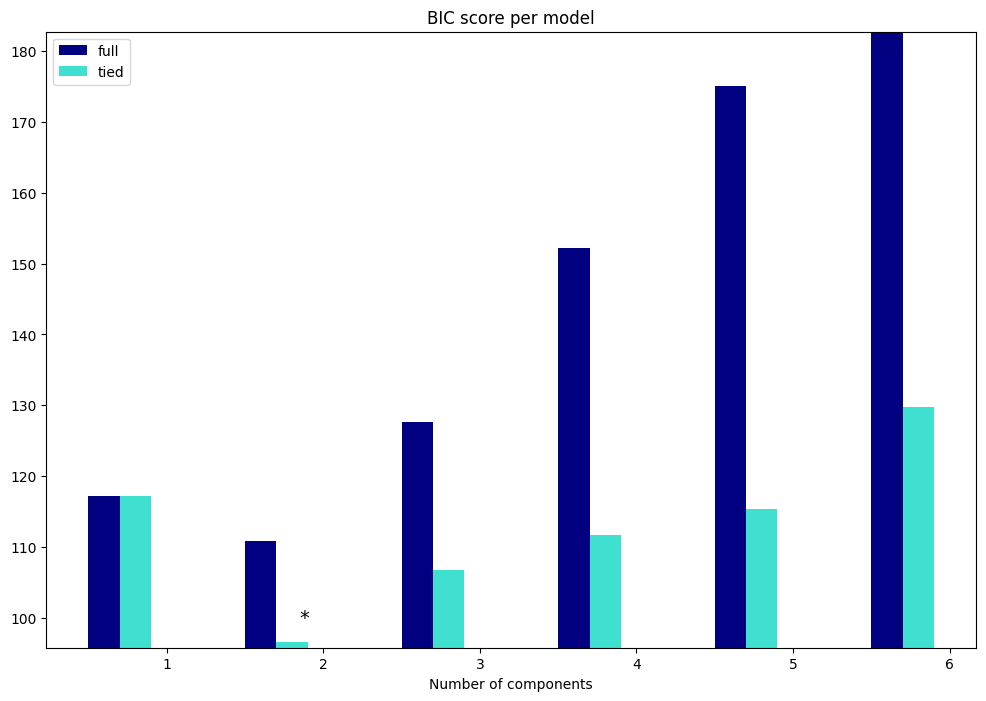

In [4]:
lowest_bic = np.infty 
bic = [] 
n_components_range = range(1, 7) 
# cv_types = ['spherical', 'tied', 'diag', 'full'] 
cv_types = ['full', 'tied'] 
for cv_type in cv_types: 
    for n_components in n_components_range: 
        # Fit Gaussian mixture theo phương pháp huấn luyện EM 
        gmm = GaussianMixture(n_components=n_components, 
                                      covariance_type=cv_type) 
        gmm.fit(X_std) 
        bic.append(gmm.bic(X_std)) 
        # Gán model có BIC scores thấp nhất là model tốt nhất 
        if bic[-1] < lowest_bic: 
            lowest_bic = bic[-1] 
            best_gmm = gmm 
 
bic = np.array(bic) 
color_iter = itertools.cycle(['navy', 'turquoise']) 
clf = best_gmm 
bars = [] 
 
# Vẽ biểu đồ BIC scores 
plt.figure(figsize=(12, 8)) 
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)): 
    xpos = np.array(n_components_range) + .2 * (i - 2) 
    bars.append(plt.bar(xpos, bic[i * len(n_components_range): 
                                  (i + 1) * len(n_components_range)], 
                        width=.2, color=color)) 
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()]) 
plt.title('BIC score per model') 
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 + .2 * np.floor(bic.argmin() / len(n_components_range)) 
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14) 
plt.xlabel('Number of components') 
plt.legend([b[0] for b in bars], cv_types) 

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects

def _plot_kmean_scatter(X, labels): 
    ''' 
    X: dữ liệu đầu vào 
    labels: nhãn dự báo 
    ''' 
    # lựa chọn màu sắc 
    num_classes = len(np.unique(labels)) 
    palette = np.array(sns.color_palette("hls", num_classes)) 
 
    # vẽ biểu đồ scatter 
    fig = plt.figure(figsize=(12, 8)) 
    ax = plt.subplot() 
    sc = ax.scatter(X[:,0], X[:,1], lw=0, s=40, c=palette[labels.astype(int)]) 
 
    # thêm nhãn cho mỗi cluster 
    txts = [] 
 
    for i in range(num_classes): 
        # Vẽ text tên cụm tại trung vị của mỗi cụm 
        xtext, ytext = np.median(X[labels == i, :], axis=0) 
        txt = ax.text(xtext, ytext, str(i), fontsize=24) 
        txt.set_path_effects([ 
            PathEffects.Stroke(linewidth=5, foreground="w"), 
            PathEffects.Normal()]) 
        txts.append(txt) 
    plt.title('t-sne visualization') 
    plt.show()  # Show the plot explicitly


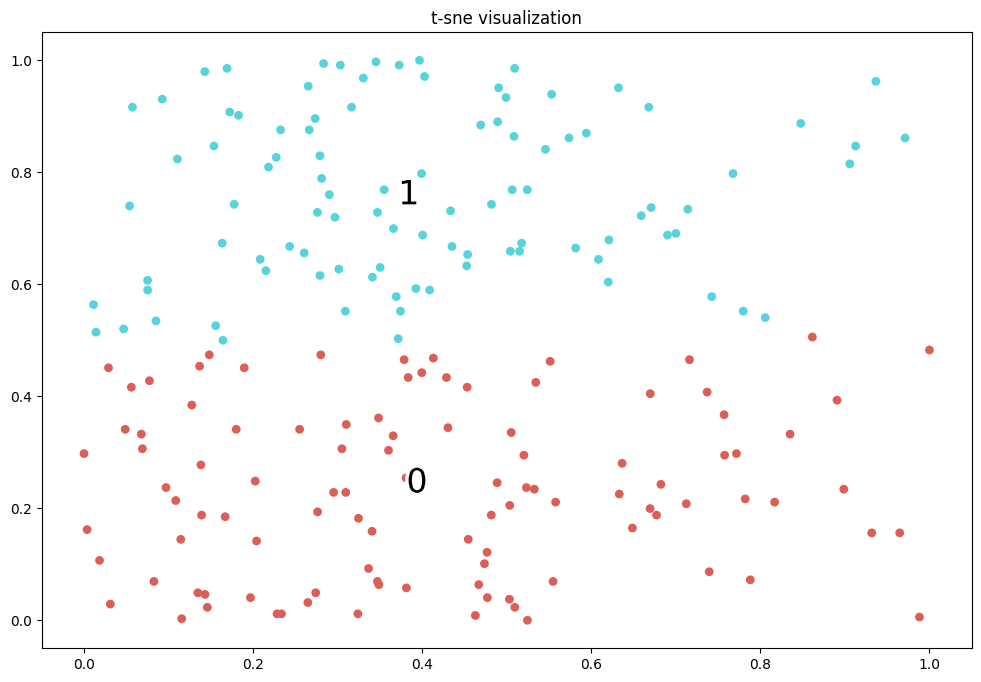

In [8]:
labels = best_gmm.predict(X_std) 
_plot_kmean_scatter(X_std, labels) 